Visualizing Hierarchies
----
Visualizations help data scientists communicate insights, especially to non-technical audiences.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [45]:
grains = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Grains\seeds.csv")
# Sample 20% stratified data
grain_samples_df = grains.groupby('Varieties').sample(frac=0.2, random_state=42)

# Extract the values for clustering
samples = grain_samples_df.drop('Varieties', axis=1).values

# Extract the corresponding labels
varieties = grain_samples_df['Varieties'].values

Hierarchical Clustering of Grain Data
----

Use the linkage() function from SciPy to perform hierarchical clustering on the array samples.
Visualize the clustering result with the dendrogram() function.
The array samples contains grain measurements, and the list varieties holds the corresponding grain types.

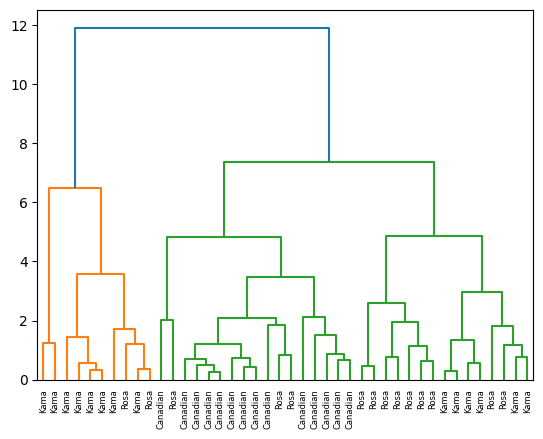

In [46]:
#1. Import:linkage and dendrogram from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram

#2. Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to merging.
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Hierarchies of stocks
----
Perform hierarchical clustering on the companies using their stock price movements.
* The NumPy array movements contains price movement data, with each row representing a company.
* The list companies holds the company names.


Since SciPy hierarchical clustering cannot be used in a sklearn pipeline, apply normalize() from sklearn.preprocessing instead of using Normalizer.

In [47]:
stock = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\company-stock-movements-2010-2015-incl.csv")
movements = stock.iloc[:,1:].values
company = stock.iloc[:,0].values

print(movements.shape)
print(company)

(60, 963)
['Apple' 'AIG' 'Amazon' 'American express' 'Boeing' 'Bank of America'
 'British American Tobacco' 'Canon' 'Caterpillar' 'Colgate-Palmolive'
 'ConocoPhillips' 'Cisco' 'Chevron' 'DuPont de Nemours' 'Dell' 'Ford'
 'General Electrics' 'Google/Alphabet' 'Goldman Sachs' 'GlaxoSmithKline'
 'Home Depot' 'Honda' 'HP' 'IBM' 'Intel' 'Johnson & Johnson'
 'JPMorgan Chase' 'Kimberly-Clark' 'Coca Cola' 'Lookheed Martin'
 'MasterCard' 'McDonalds' '3M' 'Microsoft' 'Mitsubishi' 'Navistar'
 'Northrop Grumman' 'Novartis' 'Pepsi' 'Pfizer' 'Procter Gamble'
 'Philip Morris' 'Royal Dutch Shell' 'SAP' 'Schlumberger' 'Sony'
 'Sanofi-Aventis' 'Symantec' 'Toyota' 'Total'
 'Taiwan Semiconductor Manufacturing' 'Texas instruments' 'Unilever'
 'Valero Energy' 'Walgreen' 'Wells Fargo' 'Wal-Mart' 'Exxon' 'Xerox'
 'Yahoo']


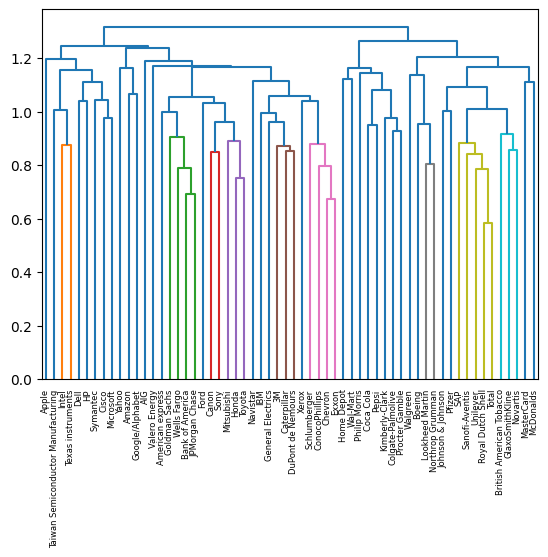

In [48]:
#1. Import normalize from sklearn.preprocessing.
from sklearn.preprocessing import normalize

#2. Rescale the price movements for each stock by using the normalize() function on movements.
normalized_movements = normalize(movements)

#3. Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
mergings_st = linkage(normalized_movements, method='complete')

#4. Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.
dendrogram(mergings_st,
           labels=company,
           leaf_rotation=90,
           leaf_font_size =6)
plt.show()


Extracting Cluster Labels from Hierarchical Clustering
---

Use the `fcluster()` function to extract cluster labels from the hierarchical clustering result stored in `mergings`. Set the threshold to a height of 6 to form 3 clusters. Compare the extracted cluster labels with the actual grain varieties using a cross-tabulation to evaluate how well the clustering reflects the known categories.


In [49]:
#1. Import fcluster from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

#2. Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
labels = fcluster(mergings, 6, criterion='distance')

#3. Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
df = pd.DataFrame({'labels': labels, 'varieties':varieties})

#4. Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Canadian  Kama  Rosa
labels                         
1                 0     2     0
2                 0     6     2
3                14     0     3
4                 0     6     9
